#### Problem Statement:

Climate change associated risks are imposing adverse impacts on human civilization. Increasing number
of countries are slowly moving towards renewable energy based power generation, to combat climate change.
This dataset contains information about power generation from different fossil fuel based 
& renewabale based sources of power. Our scope of study is limited to data of India. We will focus
on data processing & Exploratory Data Analysis (EDA). We will study how power generation has varied over
the years as well as power generation with respect to different power sources etc. We will focus on data
analysis as well as data visualization aspects, to reach at efficient analysis.

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [2]:
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


#### Finding Information of this dataset

In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

This dataset contains total 27 columns, out of which 15 are of float datatype & 12 are of object type.
Some of the columns don't hold required information, that is relevant to our analysis. We will drop them

Now we check missing value information

In [5]:
(df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending=False).astype('str')+' %'

estimated_generation_gwh    100.0 %
other_fuel3                 100.0 %
wepp_id                     100.0 %
generation_gwh_2013         100.0 %
generation_gwh_2019         100.0 %
other_fuel2                 99.89 %
other_fuel1                 78.17 %
owner                       62.29 %
generation_gwh_2014         56.12 %
generation_gwh_2015         53.47 %
generation_gwh_2016         52.15 %
generation_gwh_2017         51.49 %
generation_gwh_2018         50.61 %
generation_data_source       50.5 %
year_of_capacity_data       42.78 %
commissioning_year           41.9 %
latitude                     5.07 %
longitude                    5.07 %
geolocation_source           2.09 %
country                       0.0 %
url                           0.0 %
country_long                  0.0 %
primary_fuel                  0.0 %
capacity_mw                   0.0 %
gppd_idnr                     0.0 %
name                          0.0 %
source                        0.0 %
dtype: object

#### DATA PRE-PROCESSING

Columns such as estimated_generation_gwh,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,other_fuel2,other_fuel1 either have no information in them or too much missing information. It's is safe to drop them.

In [6]:
df.drop(['estimated_generation_gwh','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','other_fuel2','other_fuel1'], axis=1, inplace=True)

We are dealing with data related to India. So country & country_long are redundant information. So are
gppd_idnr,url,geolocation_source,generation_data_source columns which are little importance in our analysis. So, we drop them.

In [10]:
df.drop(['country','country_long','gppd_idnr','url','geolocation_source','generation_data_source'], axis=1, inplace=True)

In [11]:
(df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending=False).astype('str')+' %'

owner                    62.29 %
generation_gwh_2014      56.12 %
generation_gwh_2015      53.47 %
generation_gwh_2016      52.15 %
generation_gwh_2017      51.49 %
generation_gwh_2018      50.61 %
year_of_capacity_data    42.78 %
commissioning_year        41.9 %
latitude                  5.07 %
longitude                 5.07 %
name                       0.0 %
capacity_mw                0.0 %
primary_fuel               0.0 %
source                     0.0 %
dtype: object

Now, we treat missing values present in columns, with respect to column datatype

In [12]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

Let's look at the column 'year_of_capacity_data'

In [13]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

So, we don't have much useful information in this column. We can drop it as well.

In [14]:
df.drop(['year_of_capacity_data'], axis=1, inplace=True)

In [15]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [16]:
df['owner'].fillna(method = 'ffill', inplace=True)

In [17]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [18]:
df['owner'].fillna(2015.0, inplace=True)

In [19]:
print(df['latitude'].value_counts())
print(df['longitude'].value_counts())

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


In [21]:
df['longitude'].fillna(method = 'ffill', inplace=True)
df['latitude'].fillna(method = 'ffill', inplace=True)

We need to handle missing value in the column commissioning_year 

In [23]:
df['commissioning_year'].fillna(2015.0, inplace=True)

In [24]:
(df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending=False).astype('str')+' %'

name                   0.0 %
capacity_mw            0.0 %
latitude               0.0 %
longitude              0.0 %
primary_fuel           0.0 %
commissioning_year     0.0 %
owner                  0.0 %
source                 0.0 %
generation_gwh_2014    0.0 %
generation_gwh_2015    0.0 %
generation_gwh_2016    0.0 %
generation_gwh_2017    0.0 %
generation_gwh_2018    0.0 %
dtype: object

In [25]:
df['commissioning_year'] = df['commissioning_year'].astype('int64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   commissioning_year   907 non-null    int64  
 6   owner                907 non-null    object 
 7   source               907 non-null    object 
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 92.2+ KB


Our Dataset is ready for analysis.

#### EXPLORATORY DATA ANALYSIS (EDA)

#Q 1 :What is the capacity with respect to each fuel type?

In [27]:
capa_pr = df['capacity_mw'].groupby(df['primary_fuel']).sum().sort_values(ascending=False).round(2)
capa_pr

primary_fuel
Coal       205839.22
Hydro       46441.77
Gas         25172.51
Nuclear      8780.00
Wind         4111.85
Solar        2757.50
Oil          1778.84
Biomass      1003.26
Name: capacity_mw, dtype: float64

Capacity of Coal is still dominant fuel source, followed by Hydro, Gas & Nuclear.

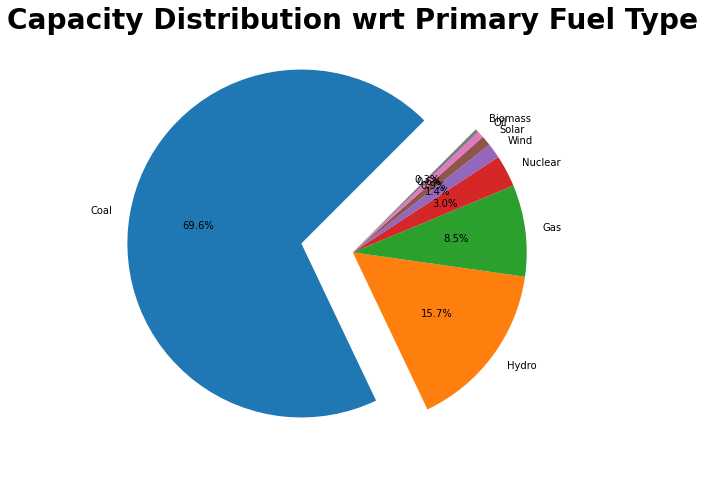

In [28]:
plt.figure(figsize = (16,8))
plt.title("Capacity Distribution wrt Primary Fuel Type",  fontdict={'fontname':'DejaVu Sans','fontsize':28,'fontweight':'bold'})
plt.pie(capa_pr, labels=capa_pr.index, startangle = 45,explode = (0.30,0,0,0,0,0,0,0),autopct='%1.1f%%')
plt.show()

#Q 2 :What is the total power generation with respect to each fuel type?

In [30]:
df['Total_Generation'] = round(df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017']+df['generation_gwh_2018'],2)
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011,Solar Paces,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2015,Ultratech Cement ltd,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2015,AES,CDM,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004,AES,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,3637.55
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015,AES,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,27859.50


In [31]:
gen_fl = df['Total_Generation'].groupby(df['primary_fuel']).sum().sort_values(ascending=False).round(2)
gen_fl

primary_fuel
Coal       5292944.45
Solar      1584521.85
Hydro      1575791.34
Wind       1534615.65
Biomass     623827.50
Gas         394470.06
Nuclear     185844.70
Oil         124215.68
Name: Total_Generation, dtype: float64

Coal leads in terms of total power generation, followed by Solar, Hydro & Wind.

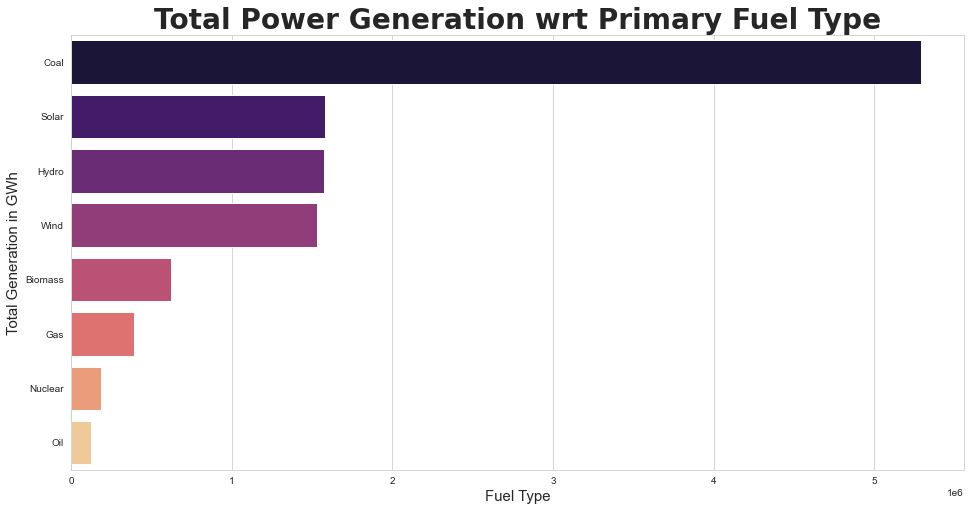

In [33]:
plt.figure(figsize = (16,8))
plt.title("Total Power Generation wrt Primary Fuel Type",  fontdict={'fontname':'DejaVu Sans','fontsize':28,'fontweight':'bold'})
sns.set_style("whitegrid")
sns.barplot(x = gen_fl.values, y = gen_fl.index, palette="magma")
plt.xlabel("Fuel Type", fontsize = 15)
plt.ylabel("Total Generation in GWh", fontsize = 15)
plt.show()

#Q3 : Determine trend of total power generation wrt commissioning year

In [34]:
tot_gn_yr = df['Total_Generation'].groupby(df['commissioning_year']).sum()
tot_gn_yr

commissioning_year
1927       1039.31
1937      12476.55
1939      12476.55
1943        131.00
1946        534.84
           ...    
2014     300221.09
2015    5122108.05
2016     175423.84
2017     125272.45
2018      52919.32
Name: Total_Generation, Length: 73, dtype: float64

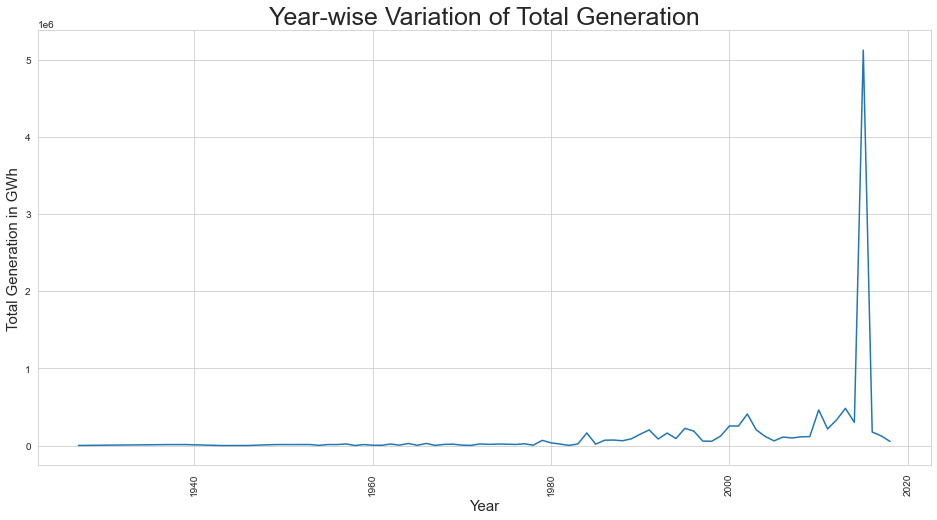

In [35]:
plt.figure(figsize = (16,8))
plt.title("Year-wise Variation of Total Generation", fontsize = 25)
sns.lineplot(x = tot_gn_yr.index, y=tot_gn_yr.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

We can see power generation started to increase from the 1990s & then it increased sharply
during 2014-2016 & it fell back down towards 2017-2018.

We can check the trend using a regression plot as follows

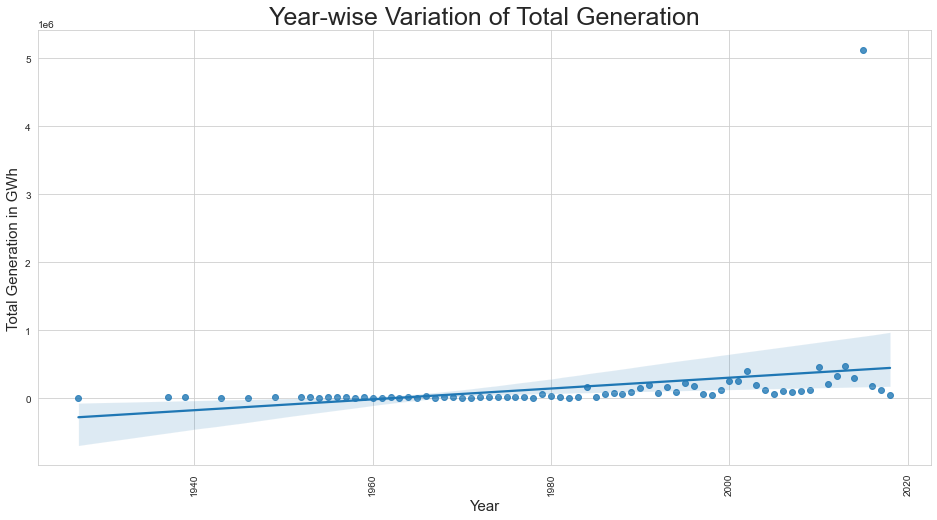

In [36]:
plt.figure(figsize = (16,8))
plt.title("Year-wise Variation of Total Generation", fontsize = 25)
sns.regplot(x = tot_gn_yr.index, y=tot_gn_yr.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

Power generation shows upward trend 

There is sharp increase during the period 2010-2018. Let's focus on this period in depth

In [37]:
df_in_sharp = df[df['commissioning_year'].between(2010,2018)]
df_in_sharp

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011,Solar Paces,National Renewable Energy Laboratory,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2015,Ultratech Cement ltd,Ultratech Cement ltd,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2015,AES,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015,AES,Central Electricity Authority,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,27859.50
7,ALLAIN DUHANGAN,192.0,32.2258,77.2070,Hydro,2010,AES,Central Electricity Authority,674.39110,721.335200,675.724400,679.594950,579.318850,3330.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,2016,Yashwantrao Krishna ssk,Central Electricity Authority,2431.82359,0.994875,233.596650,865.400000,686.500000,4218.32
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,2015,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,2015,Karnataka Power Corporation Limited,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,2015,Hindustan Zinc ltd,Hindustan Zinc ltd,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55


In [38]:
df_tot = df_in_sharp['Total_Generation'].groupby(df['commissioning_year']).sum().round(2)
df_tot

commissioning_year
2010     461070.97
2011     215429.68
2012     332007.88
2013     481597.84
2014     300221.09
2015    5122108.05
2016     175423.84
2017     125272.45
2018      52919.32
Name: Total_Generation, dtype: float64

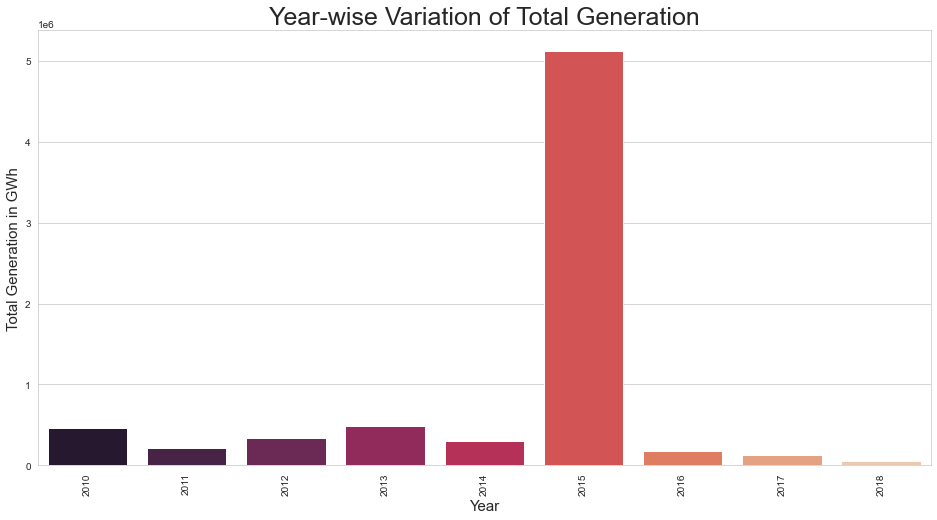

In [40]:
plt.figure(figsize = (16,8))
plt.title("Year-wise Variation of Total Generation", fontsize = 25)
sns.barplot(x = df_tot.index, y = df_tot.values, palette="rocket")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

The year 2015 saw a massive increase in total power generation compared to other years around it. We will try to find the reason behind this increase subsequently

#Q4 : Find total power generation trend for each of the fuel type 

In [41]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Power Source = Coal

In [42]:
power_coal = df[df['primary_fuel'] == 'Coal']
power_coal.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2015,Ultratech Cement ltd,Ultratech Cement ltd,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015,AES,Central Electricity Authority,3035.55000,5916.370000,6243.000000,5385.579736,7279.000000,27859.50
5,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,2005,AES,Central Electricity Authority,1153.42100,1208.852000,1175.765000,1147.913000,976.655000,5662.61
9,AMAR KANTAK,210.0,23.1642,81.6373,Coal,2008,AES,Central Electricity Authority,1887.90400,1643.046000,1338.093000,1563.457000,1487.880000,7920.38
10,AMARAVATI TPP,1350.0,21.0782,77.9009,Coal,2014,AES,Central Electricity Authority,1920.97100,5629.663000,1701.008000,4350.558000,3717.154000,17319.35


In [43]:
df_coal = power_coal['Total_Generation'].groupby(power_coal['commissioning_year']).sum().round(2)
df_coal

commissioning_year
1966      14857.90
1970       1728.35
1972      18148.87
1974      16711.00
1976       6443.15
1977       9123.00
1979      17233.93
1980      15210.36
1981       4149.06
1983       2354.14
1984      98964.03
1985      12386.15
1986      30055.56
1987      37533.36
1988      26389.44
1989      73627.27
1990     109342.62
1991     135252.62
1992      22920.00
1993      79636.71
1994      13423.04
1995     180168.64
1996      54923.38
1999      73158.51
2000     181081.71
2001     211334.58
2002     354901.09
2003     121237.00
2004      41757.26
2005      38215.23
2006      64006.00
2007      70632.82
2008      55396.18
2009     103290.09
2010     452455.55
2011     175088.55
2012     306888.33
2013     403729.06
2014     256863.05
2015    1165370.65
2016     147140.50
2017      54973.81
2018      34841.90
Name: Total_Generation, dtype: float64

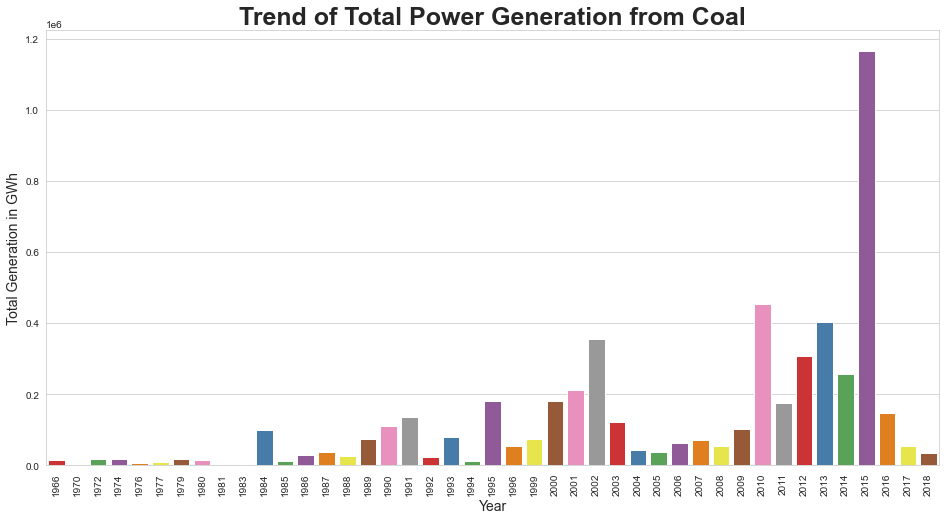

In [45]:
plt.figure(figsize = (16,8))
plt.title("Trend of Total Power Generation from Coal", fontsize = 25, fontweight='bold')
sns.barplot(x = df_coal.index, y = df_coal.values, palette="Set1")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Total Generation in GWh", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

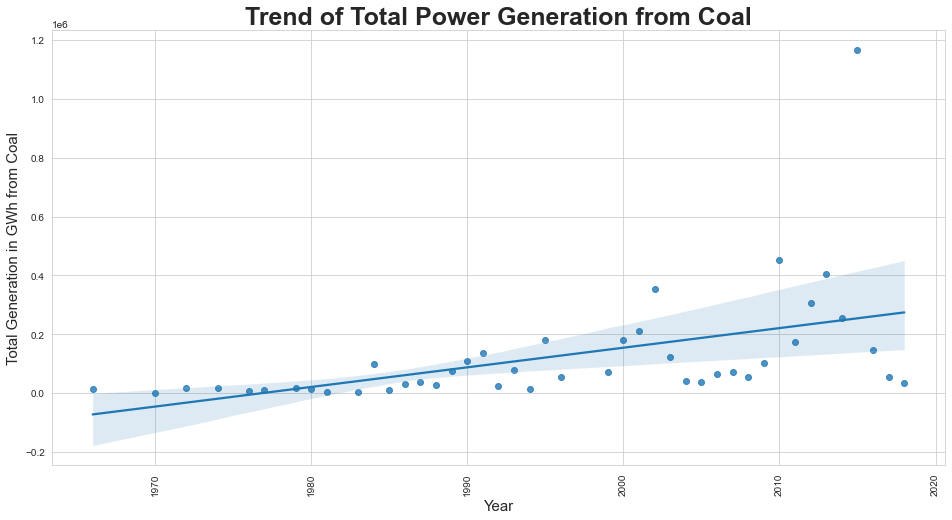

In [47]:
plt.figure(figsize = (16,8))
plt.title("Trend of Total Power Generation from Coal", fontsize = 25, fontweight = 'bold')
sns.regplot(x = df_coal.index, y = df_coal.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh from Coal", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

From the above two plots, we assert that power generation from coal in India has increased over the given time period.
It started declining from 2016 after a huge generation in 2015.

Power Source = Solar

In [48]:
power_solar = df[df['primary_fuel'] == 'Solar']
power_solar.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011,Solar Paces,National Renewable Energy Laboratory,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
25,Abhijeet,50.0,19.7881,79.1518,Solar,2015,Ener-t International Ltd.,National Renewable Energy Laboratory,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
26,Amarsar Solar Power Plant,1.0,28.3615,74.2402,Solar,2015,Nav Bharat Buildcon Private Limited,Navbharat,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
28,Ananthapur - Meil Solar Power Plant,50.0,14.9455,77.6870,Solar,2015,MEIL Green Power Limited,Meil.In/P,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
32,Askandra - DREPL Solar Power Plant,5.0,27.3473,71.6917,Solar,2015,DDE Renewable Energy Private Limited (DREPL),Lancosola,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55


In [49]:
df_solar = power_solar['Total_Generation'].groupby(power_solar['commissioning_year']).sum().round(2)
df_solar

commissioning_year
2011      12476.55
2013      37429.65
2014      37429.65
2015    1497186.00
Name: Total_Generation, dtype: float64

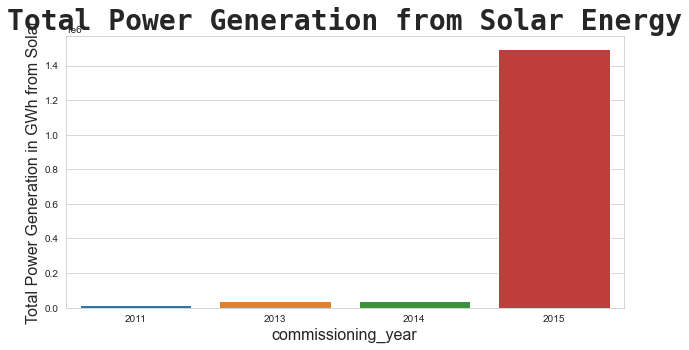

In [50]:
plt.figure(figsize = (10,5))
plt.title("Total Power Generation from Solar Energy",fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Total Power Generation in GWh from Solar", fontsize = 16)
sns.barplot(x = df_solar.index, y = df_solar.values)
plt.show()

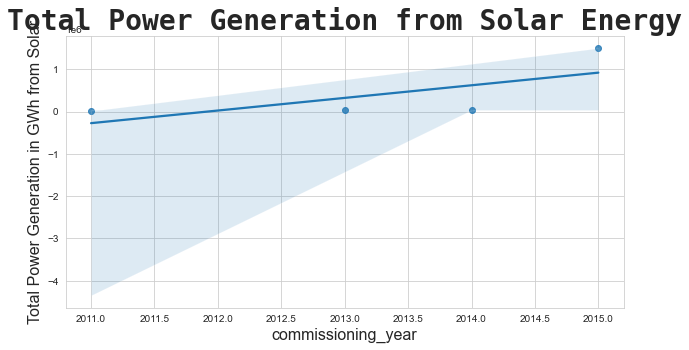

In [51]:
plt.figure(figsize = (10,5))
plt.title("Total Power Generation from Solar Energy",fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Total Power Generation in GWh from Solar", fontsize = 16)
sns.regplot(x = df_solar.index, y = df_solar.values)
plt.show()

Solar energy started to get produced in considerable quantity from 2011, with India seeing a huge production 
of power from Solar in 2015.

Power Source = Gas

In [52]:
power_gas = df[df['primary_fuel'] == 'Gas']
power_gas.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
3,AGARTALA GT,135.00,23.8712,91.3602,Gas,2004,AES,Central Electricity Authority,617.789264,843.747000,886.004428,663.77450,626.239128,3637.55
16,ANTA GT,419.33,25.1797,76.3188,Gas,1989,AES,Central Electricity Authority,1611.987000,909.000000,666.420000,430.00000,528.280000,4145.69
22,AURAIYA GT,652.00,26.6282,79.5286,Gas,1989,Shree Sugars ltd,Central Electricity Authority,1607.000000,1465.000000,509.000000,357.00000,521.000000,4459.00
58,BARAMURA,42.00,23.8070,91.5650,Gas,2006,India Ltd icl),Central Electricity Authority,304.832800,231.626436,187.193669,178.10669,173.720000,1075.48
64,BASIN BRIDGE GT,120.00,13.1021,80.2682,Gas,1996,India Ltd icl),Central Electricity Authority,2.853870,8.295912,10.468980,5.85771,0.056000,27.53


In [53]:
df_gas = power_gas['Total_Generation'].groupby(power_gas['commissioning_year']).sum().round(2)
df_gas

commissioning_year
1988     15023.60
1989     11767.64
1990      1995.25
1992     20053.00
1993      6325.27
1994     13091.62
1995      4240.84
1996      8122.02
1997     18283.34
1998       937.11
1999      7758.58
2000       965.83
2001      3419.68
2002     12609.53
2003     20762.84
2004      3637.55
2005      9341.80
2006      1965.40
2007      3598.62
2008     29618.50
2009     11771.82
2010      2020.52
2012     16301.44
2013     19419.64
2014      2639.83
2015    129992.70
2016     18806.09
Name: Total_Generation, dtype: float64

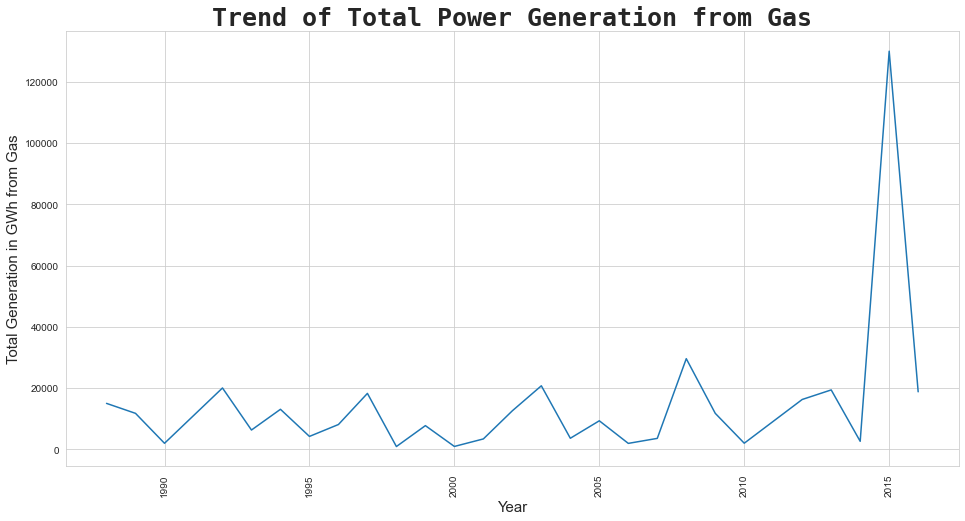

In [54]:
plt.figure(figsize = (16,8))
plt.title("Trend of Total Power Generation from Gas", fontsize = 25, fontname = 'monospace',fontweight = 'bold')
sns.lineplot(x = df_gas.index, y = df_gas.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh from Gas", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

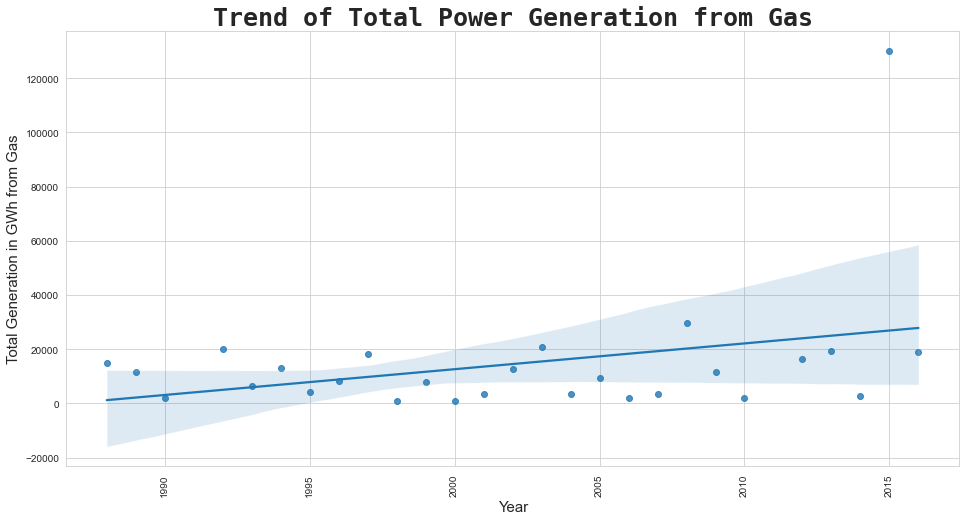

In [55]:
plt.figure(figsize = (16,8))
plt.title("Trend of Total Power Generation from Gas", fontsize = 25, fontname = 'monospace',fontweight = 'bold')
sns.regplot(x = df_gas.index, y = df_gas.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh from Gas", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

Same scenario for Gas also with power generation increasing over the time period, with a massive increase in production 
in power in 2015.

In [56]:
 df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011,Solar Paces,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2015,Ultratech Cement ltd,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2015,AES,CDM,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004,AES,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,3637.55
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015,AES,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,27859.50


Power Source = Hydro

In [57]:
power_hydro = df[df['primary_fuel'] == 'Hydro']
power_hydro.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
6,ALIYAR,60.00,10.4547,77.0078,Hydro,1970,AES,Central Electricity Authority,157.55825,152.195200,61.421350,89.629600,48.327150,509.13
7,ALLAIN DUHANGAN,192.00,32.2258,77.2070,Hydro,2010,AES,Central Electricity Authority,674.39110,721.335200,675.724400,679.594950,579.318850,3330.36
8,ALMATTI DAM,290.00,16.3300,75.8863,Hydro,2004,AES,Central Electricity Authority,480.59495,144.434200,402.029750,439.372100,406.377900,1872.81
11,ANANDPUR SAHIB ST-I&II,134.00,31.2717,76.4938,Hydro,1985,AES,Central Electricity Authority,614.41250,665.197300,670.500650,644.570950,425.641100,3020.32
13,ANDHRA,16.95,31.2412,77.8769,Hydro,1986,AES,Central Electricity Authority,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55


In [58]:
df_hydro = power_hydro['Total_Generation'].groupby(power_hydro['commissioning_year']).sum().round(2)
df_hydro

commissioning_year
1927     1039.31
1937    12476.55
1939    12476.55
1943      131.00
1946      534.84
          ...   
2014     3288.56
2015    33743.55
2016     9477.25
2017    70298.64
2018    18077.42
Name: Total_Generation, Length: 72, dtype: float64

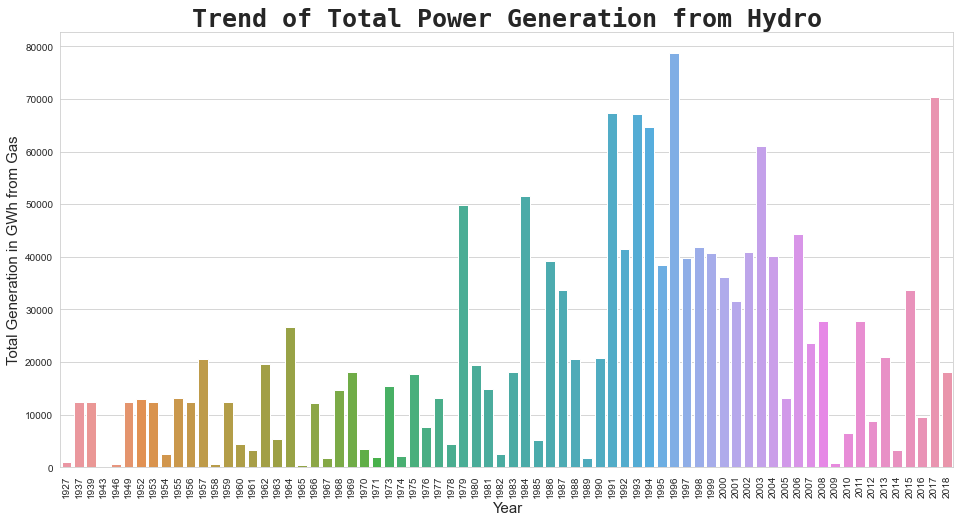

In [59]:
plt.figure(figsize = (16,8))
plt.title("Trend of Total Power Generation from Hydro", fontsize = 25, fontname = 'monospace',fontweight = 'bold')
sns.barplot(x = df_hydro.index, y = df_hydro.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh from Gas", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

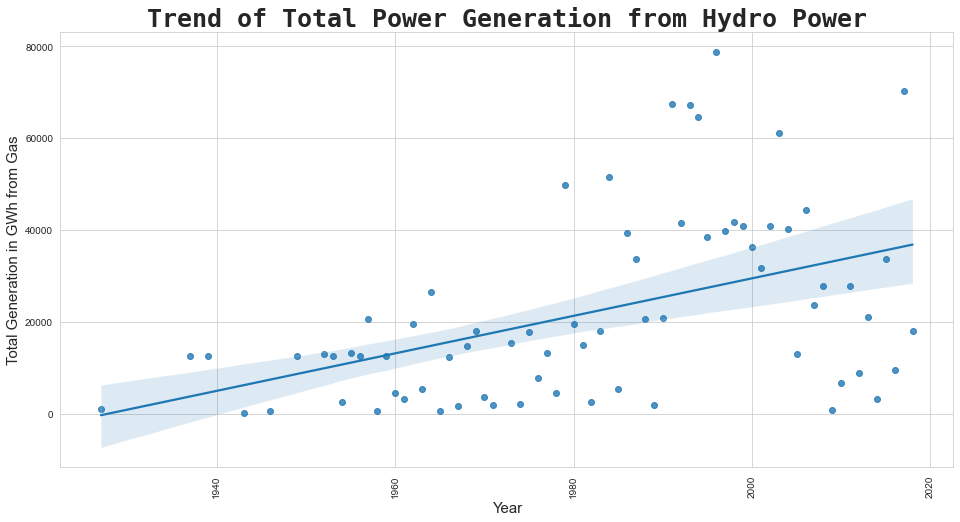

In [60]:
plt.figure(figsize = (16,8))
plt.title("Trend of Total Power Generation from Hydro Power", fontsize = 25, fontname = 'monospace',fontweight = 'bold')
sns.regplot(x = df_hydro.index, y = df_hydro.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Generation in GWh from Gas", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

The Increase of electricity production from Hydro is higher compared to other sources.

Power Source = Wind energy

In [61]:
power_wind = df[df['primary_fuel'] == 'Wind']
power_wind.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2015,AES,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
27,Anabura Wind Farm,16.5,14.5751,76.3926,Wind,2015,Nav Bharat Buildcon Private Limited,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
29,Andrha Lake Wind Farm,113.6,18.8580,73.6396,Wind,2015,MEIL Green Power Limited,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
30,Anikkadavu Wind Farm,19.8,10.7245,77.1893,Wind,2015,Madras Cement Limited,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
31,Arasinagundi Wind Farm,13.2,14.4791,76.3482,Wind,2015,Madras Cement Limited,CDM,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55


In [62]:
df_wind = df['Total_Generation'].groupby(df['commissioning_year']).sum().round(2)
df_wind

commissioning_year
1927       1039.31
1937      12476.55
1939      12476.55
1943        131.00
1946        534.84
           ...    
2014     300221.09
2015    5122108.05
2016     175423.84
2017     125272.45
2018      52919.32
Name: Total_Generation, Length: 73, dtype: float64

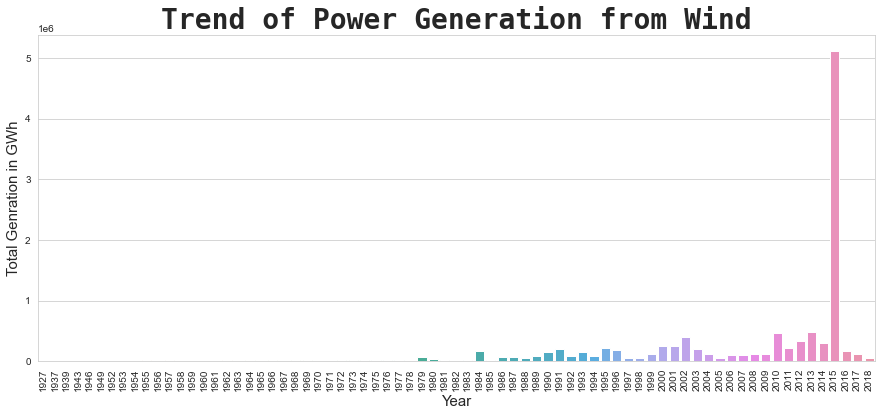

In [63]:
plt.figure(figsize = (15,6))
plt.title("Trend of Power Generation from Wind", fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
sns.barplot(x = df_wind.index, y = df_wind.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Genration in GWh", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

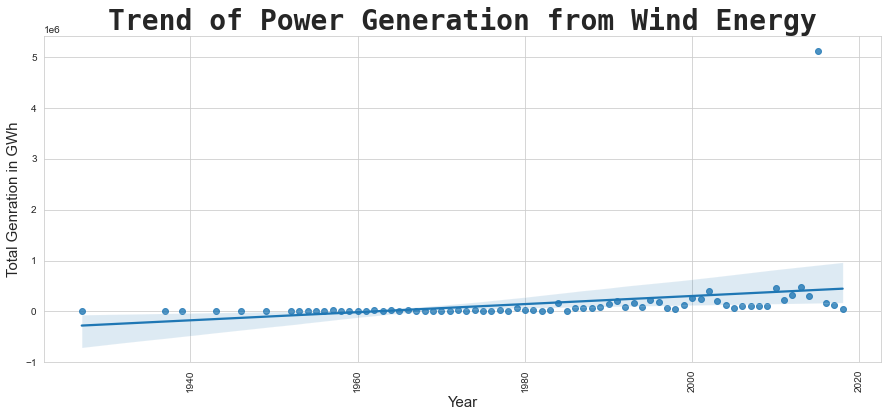

In [64]:
plt.figure(figsize = (15,6))
plt.title("Trend of Power Generation from Wind Energy", fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
sns.regplot(x = df_wind.index, y = df_wind.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Genration in GWh", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

ELectricity generation from wind energy has increased but not in huge amount over the years.

Power Source = Oil

In [65]:
power_oil = df[df['primary_fuel'] == 'Oil']
power_oil.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
72,BELLARY DG,25.2,16.2774,74.7111,Oil,2000,Vishwanath Sugars ltd,Central Electricity Authority,0.00000,0.000000,0.000000,0.000000,0.000000,0.00
105,BRAMHAPURAM DG,60.0,9.9975,76.3744,Oil,1997,Binani Industries ltd,Central Electricity Authority,8.11580,12.889900,5.117100,0.425769,0.263760,26.81
109,BUTIBORI PLANT,81.5,20.9225,78.9535,Oil,2015,Indo Synthetics ltd,Indo Synthetics ltd,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
176,DIGHE WORKS,22.0,19.1896,73.0040,Oil,2015,Mukand Mukand ltd,Mukand Mukand ltd,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55
181,DOLVI ISPAT,67.6,18.6900,73.0390,Oil,2015,Jsw Steel ltd,Jsw Steel ltd,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55


In [66]:
df_oil = df['Total_Generation'].groupby(df['commissioning_year']).sum().round(2)
df_oil

commissioning_year
1927       1039.31
1937      12476.55
1939      12476.55
1943        131.00
1946        534.84
           ...    
2014     300221.09
2015    5122108.05
2016     175423.84
2017     125272.45
2018      52919.32
Name: Total_Generation, Length: 73, dtype: float64

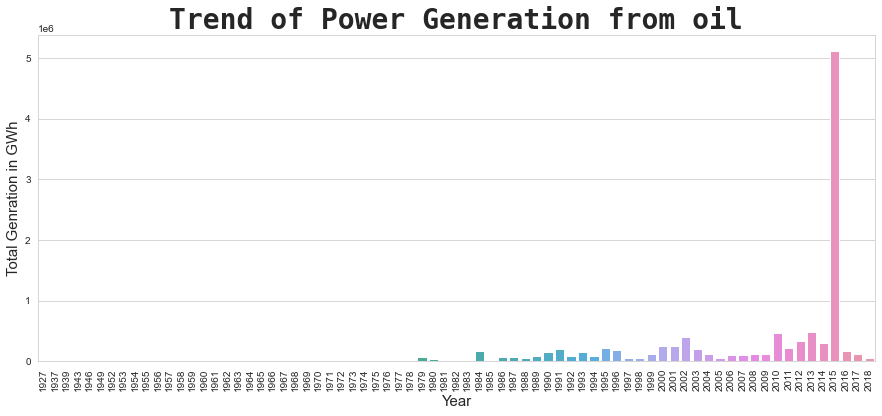

In [67]:
plt.figure(figsize = (15,6))
plt.title("Trend of Power Generation from oil", fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
sns.barplot(x = df_oil.index, y = df_oil.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Genration in GWh", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

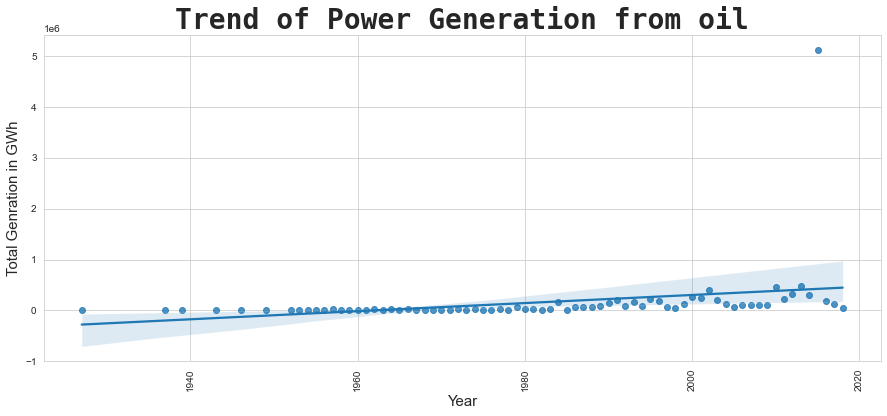

In [68]:
plt.figure(figsize = (15,6))
plt.title("Trend of Power Generation from oil", fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
sns.regplot(x = df_oil.index, y = df_oil.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Genration in GWh", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Similar situation in the case of oil as in wind energy.

Power Source = Nuclear Energy

In [69]:
power_nuclear = df[df['primary_fuel'] == 'Nuclear']
power_nuclear.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total_Generation
160,DAE RAJASTHAN,100.0,24.8747,75.6189,Nuclear,1972,Alex Green Energy Private Limited,Central Electricity Authority,2431.82359,0.000000,0.000000,0.000000,0.000000,2431.82
309,KAIGA,880.0,14.8650,74.4385,Nuclear,2004,K. N. Ram,Central Electricity Authority,5866.94000,6996.000000,5931.490000,6825.730000,6532.350000,32152.51
312,KAKRAPARA,440.0,21.2384,73.3489,Nuclear,1993,K. N. Ram,Central Electricity Authority,3155.00000,1784.000000,0.000000,0.000000,881.020000,5820.02
378,KUNDANKULAM,2000.0,8.1691,77.1327,Nuclear,2015,KS Oils,Central Electricity Authority,3875.32315,2027.000000,5724.020000,7894.400000,5562.310000,25083.05
414,Kudankulam,2000.0,8.1689,77.7126,Nuclear,2015,Tata Power Solar Systems Limited (TPREL),IAEA,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,12476.55


In [70]:
df_nuclear = power_nuclear['Total_Generation'].groupby(power_nuclear['commissioning_year']).sum().round(2)
df_nuclear

commissioning_year
1972     2431.82
1984    12272.59
1990    14756.30
1993     5820.02
1996    44694.58
2000    36157.28
2004    32152.51
2015    37559.60
Name: Total_Generation, dtype: float64

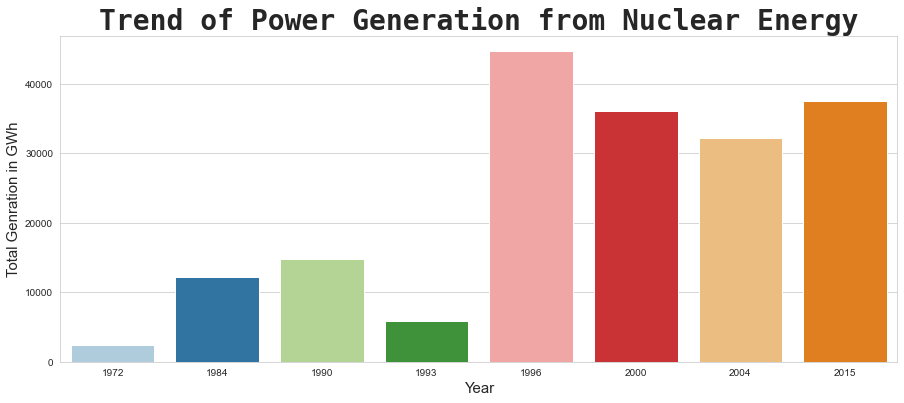

In [73]:
plt.figure(figsize = (15,6))
plt.title("Trend of Power Generation from Nuclear Energy", fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
sns.barplot(x = df_nuclear.index, y = df_nuclear.values, palette='Paired')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Genration in GWh", fontsize = 15)
plt.show()

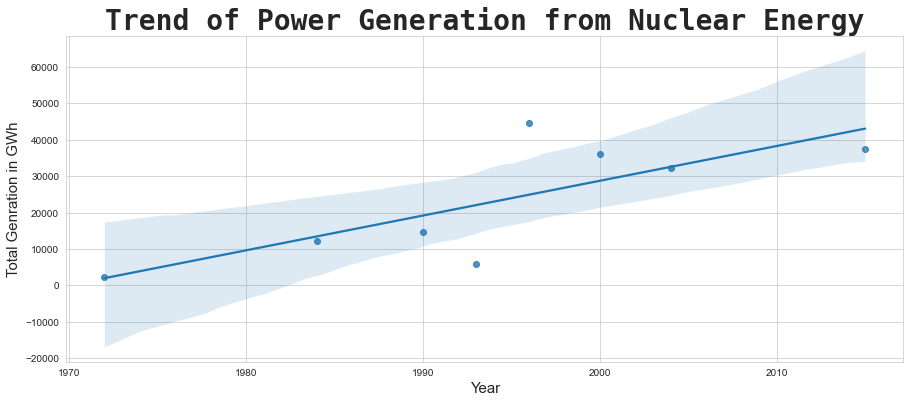

In [74]:
plt.figure(figsize = (15,6))
plt.title("Trend of Power Generation from Nuclear Energy", fontdict={'fontname':'monospace','fontsize':28,'fontweight':'bold'})
sns.regplot(x = df_nuclear.index, y = df_nuclear.values)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Genration in GWh", fontsize = 15)
plt.show()

Power generation from nuclear source started in 1972 & has grown steadily since then.

#Q5: Find total generation of power wrt to year & fuel type.

In [75]:
tot_power = df['Total_Generation'].groupby([df['commissioning_year'],df['primary_fuel']]).sum().round(2).reset_index()
tot_power

,commissioning_year,primary_fuel,Total_Generation
0,1927,Hydro,1039.31
1,1937,Hydro,12476.55
2,1939,Hydro,12476.55
3,1943,Hydro,131.00
4,1946,Hydro,534.84
...,...,...,...
161,2016,Hydro,9477.25
162,2017,Coal,54973.81
163,2017,Hydro,70298.64
164,2018,Coal,34841.90


#Q6 : Find total generation from each source of power in the year 2015 

In [81]:
df_2015 = tot_power[tot_power['commissioning_year'] == 2015].sort_values(by = 'Total_Generation', ascending=False)
df_2015

,commissioning_year,primary_fuel,Total_Generation
158,2015,Wind,1534615.65
157,2015,Solar,1497186.00
152,2015,Coal,1165370.65
151,2015,Biomass,623827.50
153,2015,Gas,129992.70
156,2015,Oil,99812.40
155,2015,Nuclear,37559.60
154,2015,Hydro,33743.55


We can see Wind was the highest generator of power in 2015, followed by another renewable energy source
Solar energy. Coal stood at third place.

#Q7: Find power generation scenario during 2010, 2016

In [82]:
df_1016 = tot_power[tot_power['commissioning_year'].between(2010,2016)]
df_1016

,commissioning_year,primary_fuel,Total_Generation
134,2010,Coal,452455.55
135,2010,Gas,2020.52
136,2010,Hydro,6594.90
137,2011,Coal,175088.55
138,2011,Hydro,27864.58
139,2011,Solar,12476.55
140,2012,Coal,306888.33
141,2012,Gas,16301.44
142,2012,Hydro,8818.11
143,2013,Coal,403729.06


#Q8 : Find power generation from Coal for the time period

In [84]:
coal_only = tot_power[tot_power['primary_fuel'] == 'Coal']
coal_only

,commissioning_year,primary_fuel,Total_Generation
21,1966,Coal,14857.90
26,1970,Coal,1728.35
29,1972,Coal,18148.87
32,1974,Coal,16711.00
35,1976,Coal,6443.15
37,1977,Coal,9123.00
40,1979,Coal,17233.93
42,1980,Coal,15210.36
44,1981,Coal,4149.06
47,1983,Coal,2354.14


#Q9 : Find Top Ten(10) Generators of power wrt Name

In [85]:
gen_name = df['Total_Generation'].groupby(df['name']).sum().round(2).sort_values(ascending=False)[:10].reset_index()
gen_name

,name,Total_Generation
0,VINDH_CHAL STPS,156908.00
1,SASAN UMPP,132896.00
2,MUNDRA TPP,129233.00
3,MUNDRA UMPP,122834.00
4,SIPAT STPS,108599.00
5,TALCHER STPS,107405.00
6,RIHAND,103170.62
7,KORBA STPS,95074.00
8,R_GUNDEM STPS,91646.00
9,TIRORA TPP,88252.00


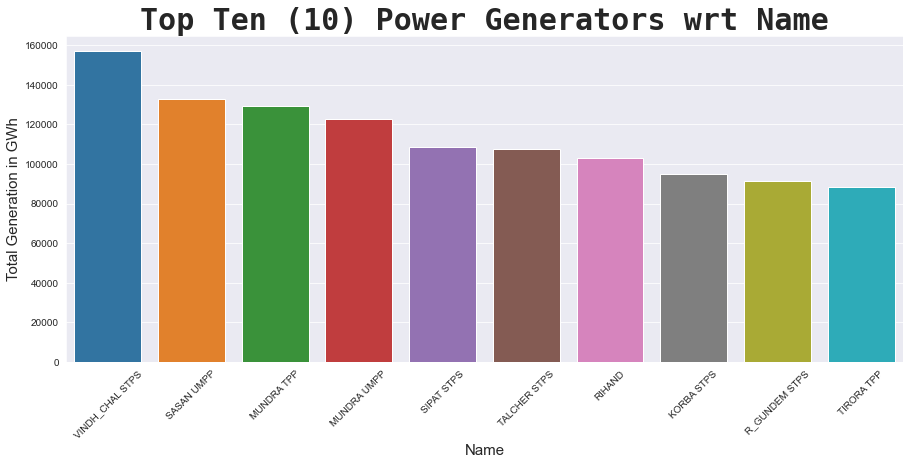

In [88]:
plt.figure(figsize = (15,6))
plt.title("Top Ten (10) Power Generators wrt Name", fontdict = {'fontname':'monospace','fontsize':30,'fontweight':'bold'})
sns.set_style("darkgrid")
sns.barplot(x = 'name', y = 'Total_Generation' ,data = gen_name)
plt.xlabel("Name", fontsize = 15)
plt.ylabel("Total Generation in GWh", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

#Q10 : Find Top (10) power generators wrt Owner

In [89]:
gen_owner = df['Total_Generation'].groupby(df['owner']).sum().round(2).sort_values(ascending=False).round(2)[:10].reset_index()
gen_owner

,owner,Total_Generation
0,Ongc Gas corp,386540.16
1,Mukesh Gupta group,340913.81
2,Serum Institute of India Limited,335871.10
3,Ambuja Cements ltd,254590.97
4,Hare Pvt ltd,252040.85
5,Shree Cement ltd,246980.96
6,Acc Acc ltd,221023.84
7,AES,220326.73
8,Vikram Vikram cement,213787.05
9,K. N. Ram,206851.50


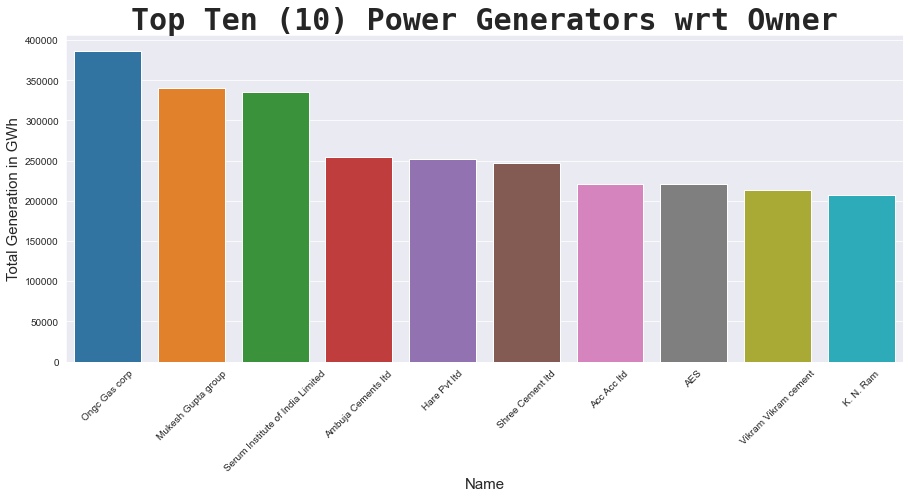

In [92]:
plt.figure(figsize = (15,6))
plt.title("Top Ten (10) Power Generators wrt Owner", fontdict = {'fontname':'monospace','fontsize':30,'fontweight':'bold'})
sns.set_style("darkgrid")
sns.barplot(x = 'owner', y = 'Total_Generation' ,data = gen_owner)
plt.xlabel("Name", fontsize = 15)
plt.ylabel("Total Generation in GWh", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

#### Conclusions:

1. Coal is the dominant source of power generation, with renewable sources power increasing their share 
in total production.
2. Total power generation reached at its peak in 2015, with all sources of power generating maximum power
3. All sources of power saw increase in production, with nuclear & solar rose higher, while other sources
increased in steady manner.
4. ONGC Gas Corp. was the highest generator as a owner.
5. VINDH_CHAL STPS was the highest generator as a name. 